In [96]:
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import random # library for random number generation
import numpy as np # library for vectorized computation 
import pandas as pd # library to process data as dataframes

!pip install pypinyin
from pypinyin import pinyin

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [97]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0


Matplotlib version:  3.0.2


In [98]:
import unicodedata

#mystr='Lǐ Zhōu Wú'
#unicodedata.normalize('NFKD', mystr).encode('ascii','ignore')

def getPYInitials(chinese_str):
    result=""
    for i in range(len(chinese_str)):
        s=pinyin(chinese_str)[i][0].upper()
        result=result+s[0:1]
    return result

def getPYString(chinese_str):
    result=""
    for i in range(len(chinese_str)):
        s=pinyin(chinese_str)[i][0].upper()
        result=result+" " +s
    #print(result)
    result=unicodedata.normalize('NFKD', result).encode('ascii','ignore')
    result=str(result, encoding='utf-8')
    return result.strip()

print(getPYInitials('鼓楼区'))
print(getPYString('鼓楼区'))

GLQ
GU LOU QU


In [99]:
CLIENT_ID = '41JLFILQGREIWVOFBTMZKE0LOVAKUZWI21Y1VG1RYOCGOHXB' # your Foursquare ID
CLIENT_SECRET = 'NROH4VTPKM4EH2SD4AH3NNBGGZUGNQCBXEASSSFIQXK055MX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 41JLFILQGREIWVOFBTMZKE0LOVAKUZWI21Y1VG1RYOCGOHXB
CLIENT_SECRET:NROH4VTPKM4EH2SD4AH3NNBGGZUGNQCBXEASSSFIQXK055MX


In [100]:
#使用百度API
AK='1jGEOu3bEsLQUoLbTd0kWrSBS1c9uN1P'

def geocodeB(address):
    base = url = 'http://api.map.baidu.com/geocoder?address={}&output=json&key={}'.format(address,AK)
    response = requests.get(base)
    answer = response.json()
    #print(answer)
    return answer['result']['location']['lng'],answer['result']['location']['lat']


In [101]:
address = '南京市'

city_lng, city_lat = geocodeB(address)
print(city_lng)
print(city_lat)


118.802422
32.064653


In [102]:
nj_nbh=pd.read_excel("https://github.com/markzhu1974/Coursera_Capstone/raw/master/housing_price_clean.xlsx")
nj_nbh.head()

,district,Avenue,Neighborhood,dealYear,totalPrice,unitPrice,quotedPrice,layout,area
0,雨花台,能仁里,凤凰和美,2017,10.0,7640,17.0,1室0厅,13.09
1,雨花台,小行,名城世家花园,2016,10.3,7613,10.3,1室1厅,13.53
2,雨花台,小行,名城世家花园,2017,10.5,7761,11.0,1室0厅,13.53
3,雨花台,小行,名城世家花园,2016,10.5,7761,10.5,1室0厅,13.53
4,雨花台,小行,名城世家花园,2015,10.5,7761,10.5,1室1厅,13.53


In [103]:
#housing_price_byyear = nj_nbh[['district','Neighborhood','dealYear','unitPrice']].groupby(['Neighborhood','dealYear']).agg({'district':'size', 'unitPrice':'mean'})
housing_price_byyear = nj_nbh[['district','Neighborhood','dealYear','unitPrice']].groupby(['Neighborhood','dealYear']).agg({'unitPrice':'mean'})
housing_price_byyear.reset_index(inplace=True)
##set new column names
housing_price_byyear.columns = ['Neighborhood','dealYear','avgPrice']
housing_price_byyear.sort_values(by='Neighborhood', ascending=True, inplace=True)
housing_price_byyear['avgPrice']=housing_price_byyear['avgPrice'].astype('int')
housing_price_byyear.head(10)

#glnbh50 = gulou_nbh_grouped.sort_values(by='size', ascending=False).head(50)
#glnbh50['avgPrice']=glnbh50['avgPrice'].astype('int')
#glnbh50.reset_index(drop=True, inplace=True)
#glnbh50.head()

### use unstack to convert data
#housing_price_byyear.set_index(['Neighborhood','dealYear'], inplace=True)
#ppy=housing_price_byyear.unstack(level=1)
#ppy.reset_index(level=0, col_level=1, inplace=True)
##ppy.reindex()

### use pivot to convert data
ppy=housing_price_byyear.pivot_table('avgPrice', index='Neighborhood', columns='dealYear', aggfunc='mean', margins=True, margins_name='Avg')
ppy.reset_index(inplace=True)
#ppy.drop(['dealYear'],axis=1)
##ppy.index.drop('dealYear')
#ppy.set_index('Neighborhood', inplace=True)
ppy.head()



dealYear,Neighborhood,2012,2013,2014,2015,2016,2017,Avg
0,21世纪假日花园,NaN,NaN,NaN,NaN,12538.0,22290.0,17414.000000
1,21世纪国际公寓,NaN,NaN,NaN,NaN,22440.0,29516.0,25978.000000
2,21世纪现代城,NaN,NaN,NaN,12609.0,14646.0,15636.0,14297.000000
3,CFC长发中心,NaN,NaN,NaN,32542.0,31852.0,48735.0,37709.666667
4,一品丽庭,NaN,NaN,19986.0,NaN,NaN,NaN,19986.000000


In [104]:
housing_amount = nj_nbh[['district','Neighborhood']].groupby(['Neighborhood','district']).agg({'district':'size'})
housing_amount.columns = ['NumOfDeal']
housing_amount.reset_index(inplace=True)
#housing_amount.columns = ['Neighborhood','amount']
#housing_amount.index.drop('district')
housing_amount.sort_values(by='Neighborhood', ascending=True, inplace=True)
#housing_amount.set_index(['Neighborhood'], inplace=True)
housing_amount.head()


,Neighborhood,district,NumOfDeal
0,21世纪假日花园,江宁,3
1,21世纪国际公寓,江宁,12
2,21世纪现代城,江宁,5
3,CFC长发中心,秦淮,7
4,一品丽庭,秦淮,1


In [105]:
#ppy['Amount']=housing_amount['Amount']

njdata=pd.merge(housing_amount, ppy, on='Neighborhood')

#njdata.sort_values(by='NumOfDeal', ascending=False, inplace=True)
#njdata['Avg']=njdata['Avg'].astype('int')
##njdata.reset_index(inplace=True)
njdata.head(20)

,Neighborhood,district,NumOfDeal,2012,2013,2014,2015,2016,2017,Avg
0,21世纪假日花园,江宁,3,NaN,NaN,NaN,NaN,12538.0,22290.0,17414.000000
1,21世纪国际公寓,江宁,12,NaN,NaN,NaN,NaN,22440.0,29516.0,25978.000000
2,21世纪现代城,江宁,5,NaN,NaN,NaN,12609.0,14646.0,15636.0,14297.000000
3,CFC长发中心,秦淮,7,NaN,NaN,NaN,32542.0,31852.0,48735.0,37709.666667
4,一品丽庭,秦淮,1,NaN,NaN,19986.0,NaN,NaN,NaN,19986.000000
5,一品嘉园,秦淮,10,NaN,NaN,NaN,27969.0,17491.0,35152.0,26870.666667
6,一枝园小区,玄武,33,17300.0,19299.0,21410.0,23290.0,26961.0,28046.0,22717.666667
7,丁家桥1-37号,鼓楼,1,NaN,NaN,NaN,NaN,21569.0,NaN,21569.000000
8,丁村小区,秦淮,1,NaN,NaN,NaN,NaN,19364.0,NaN,19364.000000
9,丁香园,鼓楼,4,NaN,NaN,NaN,NaN,32668.0,NaN,32668.000000


In [106]:
#housing_price_byyear = nj_nbh[['district','Neighborhood','dealYear','unitPrice']].groupby(['Neighborhood','dealYear']).agg({'unitPrice':'mean'})


#distdata=njdata.groupby(['district']).agg({2012:'mean',2013:'mean',2014:'mean',2015:'mean',2016:'mean',2017:'mean','Avg':'mean'})
distdata=njdata.groupby(['district']).agg({2012:'mean',2013:'mean',2014:'mean',2015:'mean',2016:'mean',2017:'mean'})
distdata.dropna(inplace=True)
distdata=distdata.astype('int')
###distdata.reset_index(inplace=True)
###distdata.set_index('district',inplace=True)
#for i in len()
#distdata['district']=distdata['district']
order=[2012,2013,2014,2015,2016,2017]
distdata=distdata[order]
distdata.reset_index(inplace=True)
distdata

,district,2012,2013,2014,2015,2016,2017
0,建邺,17168,20321,21809,22311,27524,32745
1,栖霞,18739,19279,22955,16226,20118,24106
2,玄武,19673,21834,24718,21625,23797,28418
3,秦淮,17336,18246,19569,20024,22988,27978
4,雨花台,15516,18049,19063,17841,21267,25725
5,鼓楼,19262,22888,24163,24382,27052,31621


In [107]:
for i in range(0,len(distdata['district'])):
    distdata.loc[i,'DISTRICT_PY']=getPYString(distdata.loc[i,'district'])

order=['district','DISTRICT_PY', 2012,2013,2014,2015,2016,2017]
distdata=distdata[order]
distdata

,district,DISTRICT_PY,2012,2013,2014,2015,2016,2017
0,建邺,JIAN YE,17168,20321,21809,22311,27524,32745
1,栖霞,QI XIA,18739,19279,22955,16226,20118,24106
2,玄武,XUAN WU,19673,21834,24718,21625,23797,28418
3,秦淮,QIN HUAI,17336,18246,19569,20024,22988,27978
4,雨花台,YU HUA TAI,15516,18049,19063,17841,21267,25725
5,鼓楼,GU LOU,19262,22888,24163,24382,27052,31621


In [108]:
d=distdata.drop(['district'],axis=1)
d.set_index('DISTRICT_PY',inplace=True)
d

,2012,2013,2014,2015,2016,2017
DISTRICT_PY,,,,,,
JIAN YE,17168,20321,21809,22311,27524,32745
QI XIA,18739,19279,22955,16226,20118,24106
XUAN WU,19673,21834,24718,21625,23797,28418
QIN HUAI,17336,18246,19569,20024,22988,27978
YU HUA TAI,15516,18049,19063,17841,21267,25725
GU LOU,19262,22888,24163,24382,27052,31621


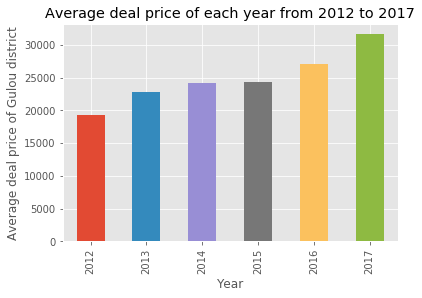

In [109]:
d.loc['GU LOU',:].plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Average deal price of Gulou district')
plt.title('Average deal price of each year from 2012 to 2017')
plt.show()

No handles with labels found to put in legend.


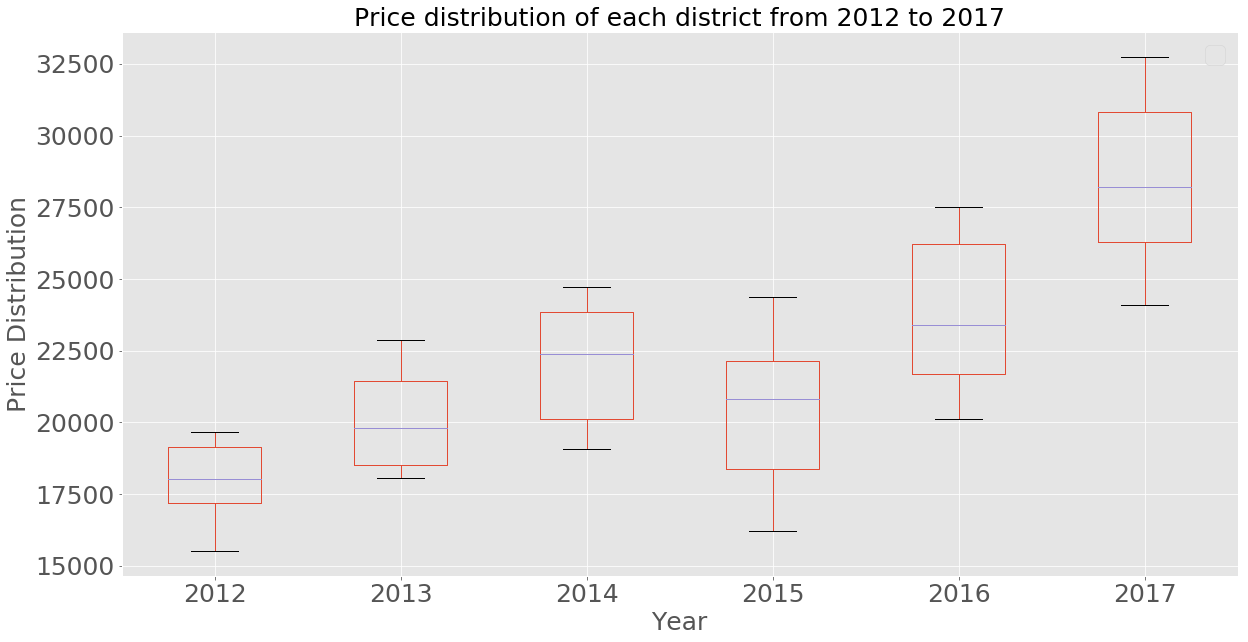

In [110]:
d.plot(kind='box',figsize=(20, 10))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.ylabel('Price Distribution',fontsize=25)
plt.title('Price distribution of each district from 2012 to 2017',fontsize=25)
plt.legend(fontsize=25)
plt.show()

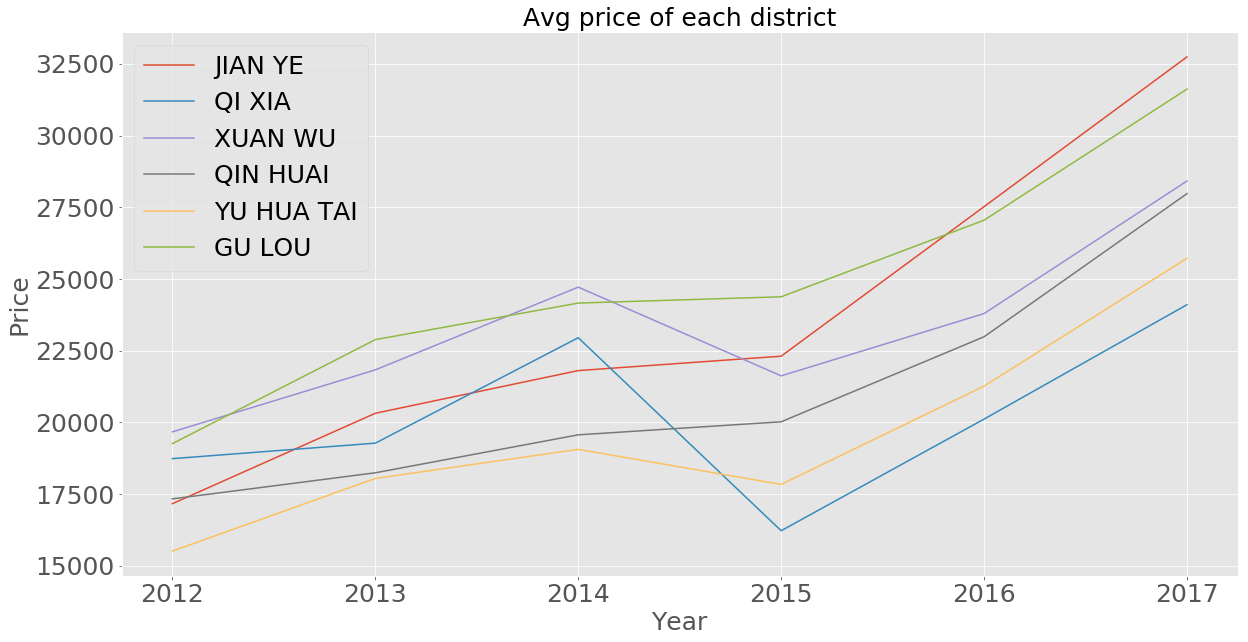

In [111]:
d.T.plot(kind='line', figsize=(20, 10))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.ylabel('Price',fontsize=25)
plt.title('Avg price of each district',fontsize=25)
plt.legend(fontsize=25)
plt.show()

In [112]:
d['growth']=d[2017]-d[2012]
d.sort_values(by='growth', ascending=True, inplace=True)
d

,2012,2013,2014,2015,2016,2017,growth
DISTRICT_PY,,,,,,,
QI XIA,18739,19279,22955,16226,20118,24106,5367
XUAN WU,19673,21834,24718,21625,23797,28418,8745
YU HUA TAI,15516,18049,19063,17841,21267,25725,10209
QIN HUAI,17336,18246,19569,20024,22988,27978,10642
GU LOU,19262,22888,24163,24382,27052,31621,12359
JIAN YE,17168,20321,21809,22311,27524,32745,15577


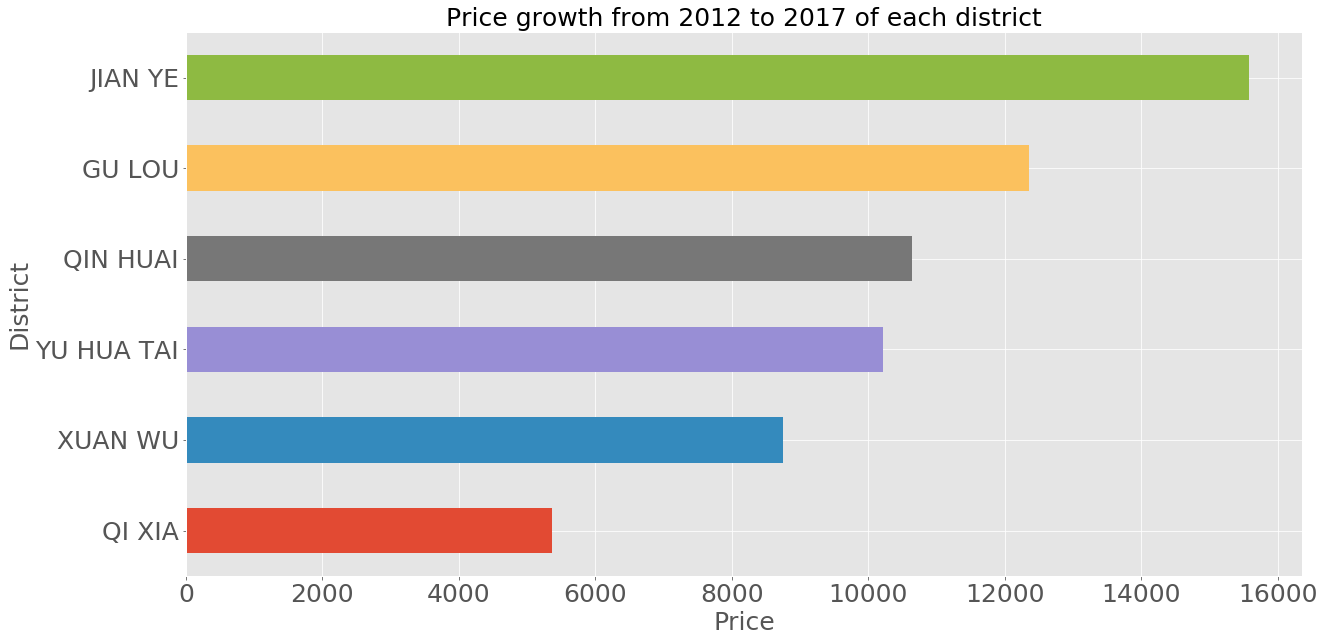

In [113]:
d['growth'].plot(kind='barh', figsize=(20, 10))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Price',fontsize=25)
plt.ylabel('District',fontsize=25)
plt.title('Price growth from 2012 to 2017 of each district',fontsize=25)
#plt.legend(fontsize=25)
plt.show()

In [114]:
njdata.sort_values(by='NumOfDeal', ascending=False, inplace=True)

n=njdata.dropna()
n=n.head(100)
n=n.reset_index(drop=True)
n.head()

,Neighborhood,district,NumOfDeal,2012,2013,2014,2015,2016,2017,Avg
0,怡景花园,鼓楼,191,22264.0,30023.0,34049.0,32071.0,40118.0,61114.0,36606.500000
1,瑞金北村,秦淮,183,17860.0,22406.0,25557.0,25348.0,29892.0,35167.0,26038.333333
2,名仕嘉园,建邺,180,16646.0,18898.0,20292.0,18898.0,24098.0,29535.0,21394.500000
3,育才公寓,鼓楼,171,21491.0,28752.0,31886.0,33398.0,45566.0,53812.0,35817.500000
4,银城花园北片,鼓楼,170,17925.0,22199.0,25931.0,26751.0,36651.0,41731.0,28531.333333


In [115]:
for i in range(0,len(n[['Neighborhood','district']])):
    n.loc[i,'NEIGHBORHOOD_PY']=getPYString(n.loc[i,'Neighborhood'])
    n.loc[i,'DISTRICT_PY']=getPYString(n.loc[i,'district'])

order=['Neighborhood','NEIGHBORHOOD_PY','district','DISTRICT_PY', 2012,2013,2014,2015,2016,2017]
n=n[order]
n_nbh_dist=n[['Neighborhood','NEIGHBORHOOD_PY','district','DISTRICT_PY']]

n=n.drop(['Neighborhood','district'],axis=1)
n[[2012,2013,2014,2015,2016,2017]]=n[[2012,2013,2014,2015,2016,2017]].astype('int')
n.head()

,NEIGHBORHOOD_PY,DISTRICT_PY,2012,2013,2014,2015,2016,2017
0,YI JING HUA YUAN,GU LOU,22264,30023,34049,32071,40118,61114
1,RUI JIN BEI CUN,QIN HUAI,17860,22406,25557,25348,29892,35167
2,MING SHI JIA YUAN,JIAN YE,16646,18898,20292,18898,24098,29535
3,YU CAI GONG YU,GU LOU,21491,28752,31886,33398,45566,53812
4,YIN CHENG HUA YUAN BEI PIAN,GU LOU,17925,22199,25931,26751,36651,41731


In [116]:
n_nbh_dist

,Neighborhood,NEIGHBORHOOD_PY,district,DISTRICT_PY
0,怡景花园,YI JING HUA YUAN,鼓楼,GU LOU
1,瑞金北村,RUI JIN BEI CUN,秦淮,QIN HUAI
2,名仕嘉园,MING SHI JIA YUAN,建邺,JIAN YE
3,育才公寓,YU CAI GONG YU,鼓楼,GU LOU
4,银城花园北片,YIN CHENG HUA YUAN BEI PIAN,鼓楼,GU LOU
5,芳草园,FANG CAO YUAN,鼓楼,GU LOU
6,金舟花园,JIN ZHOU HUA YUAN,鼓楼,GU LOU
7,新河一村,XIN HE YI CUN,鼓楼,GU LOU
8,王府园小区,WANG FU YUAN XIAO QU,秦淮,QIN HUAI
9,华阳佳园华彩苑,HUA YANG JIA YUAN HUA CAI YUAN,鼓楼,GU LOU


In [117]:
n['growth']=n[2017]-n[2012]
n.sort_values(by='growth', ascending=True, inplace=True)
top15nbh=n.tail(15)
top15nbh.set_index('NEIGHBORHOOD_PY',inplace=True)
top15nbh

,DISTRICT_PY,2012,2013,2014,2015,2016,2017,growth
NEIGHBORHOOD_PY,,,,,,,,
JIN LING SHI JI HUA YUAN,GU LOU,21297,28106,27757,32159,41619,47580,26283
LA DE FANG SI,JIAN YE,18256,23520,26172,30144,39838,44775,26519
SHI DAI TIAN DI GUANG CHANG,GU LOU,21303,26100,31484,34287,54212,48759,27456
JIN ZHOU HUA YUAN,GU LOU,21426,25853,28022,28831,41930,49173,27747
YOU ZHENG SHI JI HUA YUAN,GU LOU,23432,29818,30787,32519,44721,51198,27766
XIN HE YI CUN,GU LOU,15038,23921,25600,28909,37018,42821,27783
XIN HE ER CUN,GU LOU,13315,23076,25644,27806,36687,41279,27964
LAN TIAN YUAN,GU LOU,26579,31733,34308,33898,43004,55422,28843
QING HE XIN YU ER CUN,GU LOU,19984,30746,32581,32955,45701,49786,29802


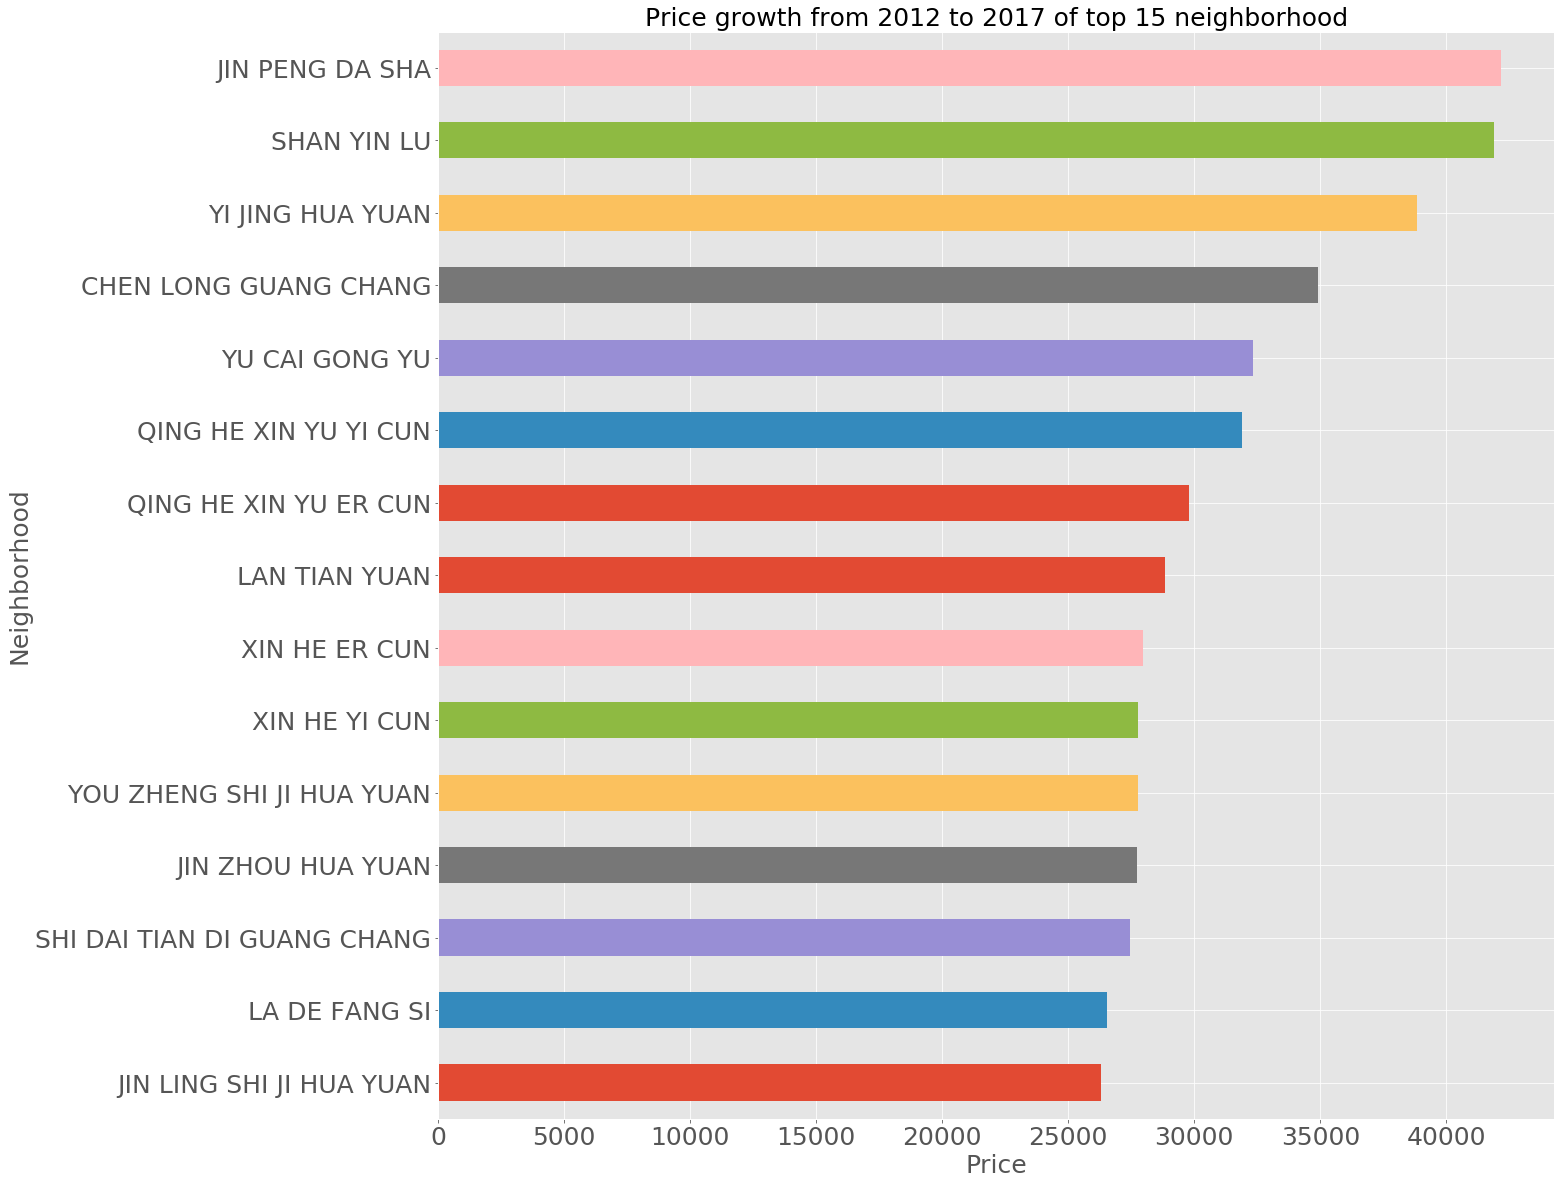

In [118]:
top15nbh['growth'].plot(kind='barh', figsize=(20, 20))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Price',fontsize=25)
plt.ylabel('Neighborhood',fontsize=25)
plt.title('Price growth from 2012 to 2017 of top 15 neighborhood',fontsize=25)
#plt.legend(fontsize=25)
plt.show()

In [119]:
# only execute once, then write it to a excel file.
for i in range(0, len(n_nbh_dist)):
    addr="南京市{}区{}".format(n_nbh_dist.loc[i,'district'],n_nbh_dist.loc[i,'Neighborhood'])
    print(addr)
    lng, lat = geocodeB(addr)
    print("{}:{},{}".format(addr,lat,lng))
    n_nbh_dist.loc[i,'Latitude']=lat
    n_nbh_dist.loc[i,'Longitude']=lng
    
n_nbh_dist.head()

南京市鼓楼区怡景花园
南京市鼓楼区怡景花园:32.049894,118.779258
南京市秦淮区瑞金北村
南京市秦淮区瑞金北村:32.042576,118.818969
南京市建邺区名仕嘉园
南京市建邺区名仕嘉园:32.043443,118.746524
南京市鼓楼区育才公寓
南京市鼓楼区育才公寓:32.051603,118.737733
南京市鼓楼区银城花园北片
南京市鼓楼区银城花园北片:32.057935,118.737041
南京市鼓楼区芳草园
南京市鼓楼区芳草园:32.061804,118.754646
南京市鼓楼区金舟花园
南京市鼓楼区金舟花园:32.056846,118.744352
南京市鼓楼区新河一村
南京市鼓楼区新河一村:32.074297,118.742595
南京市秦淮区王府园小区
南京市秦淮区王府园小区:32.033224,118.793586
南京市鼓楼区华阳佳园华彩苑
南京市鼓楼区华阳佳园华彩苑:32.051364,118.753064
南京市鼓楼区凤凰花园城静幽园
南京市鼓楼区凤凰花园城静幽园:32.048406,118.748848
南京市鼓楼区邮政世纪花园
南京市鼓楼区邮政世纪花园:32.047396,118.741439
南京市秦淮区瑞金新村
南京市秦淮区瑞金新村:32.036886,118.81846
南京市玄武区丹凤新寓
南京市玄武区丹凤新寓:32.059616,118.794277
南京市鼓楼区宁工新寓二村
南京市鼓楼区宁工新寓二村:32.064405,118.744116
南京市雨花台区应天花园
南京市雨花台区应天花园:32.017034,118.766467
南京市建邺区润花园
南京市建邺区润花园:32.027299,118.77044
南京市鼓楼区银城花园南片
南京市鼓楼区银城花园南片:32.058768,118.736478
南京市鼓楼区清河新寓一村
南京市鼓楼区清河新寓一村:32.047884,118.737864
南京市鼓楼区清河新寓二村
南京市鼓楼区清河新寓二村:32.0487,118.735936
南京市鼓楼区新河二村
南京市鼓楼区新河二村:32.072094,118.740438
南京市玄武区北门桥小区
南京市玄武区北门桥小区:32.054323,118.794141
南京市鼓楼区海德卫城
南京市鼓楼区海

,Neighborhood,NEIGHBORHOOD_PY,district,DISTRICT_PY,Latitude,Longitude
0,怡景花园,YI JING HUA YUAN,鼓楼,GU LOU,32.049894,118.779258
1,瑞金北村,RUI JIN BEI CUN,秦淮,QIN HUAI,32.042576,118.818969
2,名仕嘉园,MING SHI JIA YUAN,建邺,JIAN YE,32.043443,118.746524
3,育才公寓,YU CAI GONG YU,鼓楼,GU LOU,32.051603,118.737733
4,银城花园北片,YIN CHENG HUA YUAN BEI PIAN,鼓楼,GU LOU,32.057935,118.737041


In [120]:
# Only execute once.
#n_nbh_dist.to_excel('top100PopNbh.xls')

In [121]:
#n_nbh_dist_loc=pd.read_excel('top100PopNbh.xls')
#n_nbh_dist_loc.head()

In [122]:
nbh100loc=pd.merge(n_nbh_dist,n,left_index=True,right_index=True)
nbh100loc=nbh100loc.drop(['NEIGHBORHOOD_PY_y'],axis=1)
nbh100loc=nbh100loc.drop(['DISTRICT_PY_y'],axis=1)
nbh100loc = nbh100loc.rename(columns={'NEIGHBORHOOD_PY_x': 'NEIGHBORHOOD_PY', 'DISTRICT_PY_x': 'DISTRICT_PY'})
nbh100loc
#n_nbh_dist

,Neighborhood,NEIGHBORHOOD_PY,district,DISTRICT_PY,Latitude,Longitude,2012,2013,2014,2015,2016,2017,growth
0,怡景花园,YI JING HUA YUAN,鼓楼,GU LOU,32.049894,118.779258,22264,30023,34049,32071,40118,61114,38850
1,瑞金北村,RUI JIN BEI CUN,秦淮,QIN HUAI,32.042576,118.818969,17860,22406,25557,25348,29892,35167,17307
2,名仕嘉园,MING SHI JIA YUAN,建邺,JIAN YE,32.043443,118.746524,16646,18898,20292,18898,24098,29535,12889
3,育才公寓,YU CAI GONG YU,鼓楼,GU LOU,32.051603,118.737733,21491,28752,31886,33398,45566,53812,32321
4,银城花园北片,YIN CHENG HUA YUAN BEI PIAN,鼓楼,GU LOU,32.057935,118.737041,17925,22199,25931,26751,36651,41731,23806
5,芳草园,FANG CAO YUAN,鼓楼,GU LOU,32.061804,118.754646,23051,30671,28753,30167,37693,48447,25396
6,金舟花园,JIN ZHOU HUA YUAN,鼓楼,GU LOU,32.056846,118.744352,21426,25853,28022,28831,41930,49173,27747
7,新河一村,XIN HE YI CUN,鼓楼,GU LOU,32.074297,118.742595,15038,23921,25600,28909,37018,42821,27783
8,王府园小区,WANG FU YUAN XIAO QU,秦淮,QIN HUAI,32.033224,118.793586,14912,16379,19117,21022,27379,33195,18283
9,华阳佳园华彩苑,HUA YANG JIA YUAN HUA CAI YUAN,鼓楼,GU LOU,32.051364,118.753064,18844,21549,24148,23253,27035,33286,14442


In [123]:
lat_devi=-0.004
lng_devi=-0.012

map = folium.Map(location=[city_lat+lat_devi,city_lng+lng_devi], zoom_start=12)

for lat, lng, neighborhood, borough, growth in zip(nbh100loc['Latitude'], nbh100loc['Longitude'], nbh100loc['Neighborhood'], nbh100loc['district'], nbh100loc['growth']):
    label = '{}, {}, average price：{}'.format(neighborhood, borough, 'None')
    #print("{}:{},{}".format(label,lat,lng))
    label = folium.Popup(label, parse_html=True)
    
    if growth >= 40000 :
        lb_color='red'
    elif (growth < 40000 and growth >= 30000) :
        lb_color='orange'
    elif (growth < 30000 and growth >= 20000) :
        lb_color='blue'
    else:
        lb_color='green'
     
    folium.CircleMarker(
        [lat+lat_devi, lng+lng_devi],
        radius=3,
        popup=label,
        color=lb_color,
        fill=True,
        fill_color=lb_color,
        fill_opacity=0.7,
        parse_html=False).add_to(map),
    
map

In [124]:
LIMIT=100
radius=500

neighborhood_latitude=32.049894
neighborhood_longitude=118.779258


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=41JLFILQGREIWVOFBTMZKE0LOVAKUZWI21Y1VG1RYOCGOHXB&client_secret=NROH4VTPKM4EH2SD4AH3NNBGGZUGNQCBXEASSSFIQXK055MX&v=20180605&ll=32.049894,118.779258&radius=500&limit=100'

In [125]:
results = requests.get(url).json()

In [126]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [127]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Blue Frog (蓝蛙),Burger Joint,32.049356,118.778968
1,Apple Nanjing IST (Apple 南京艾尚天地),Electronics Store,32.047783,118.779065
2,Costa Coffee (Costa Coffee (咖世家)),Coffee Shop,32.052492,118.780254
3,Wagas 沃歌斯,Sandwich Place,32.049189,118.778826
4,Deji Plaza (德基广场),Shopping Mall,32.046455,118.779676
5,Element Fresh (新元素),New American Restaurant,32.049268,118.778835
6,大渔铁板烧 Tairyo Teppanyaki,Japanese Restaurant,32.046840,118.778955
7,IST Mall (艾尚天地),Shopping Mall,32.048175,118.779109
8,Poets Restaurant & Lounge,Thai Restaurant,32.048617,118.779280
9,Starbucks (星巴克),Coffee Shop,32.045406,118.779064


In [128]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

15 venues were returned by Foursquare.


In [129]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [130]:
nbh100_venues = getNearbyVenues(
    names=nbh100loc['Neighborhood'],
    latitudes=nbh100loc['Latitude'],
    longitudes=nbh100loc['Longitude'])

nbh100_venues.head()

怡景花园
瑞金北村
名仕嘉园
育才公寓
银城花园北片
芳草园
金舟花园
新河一村
王府园小区
华阳佳园华彩苑
凤凰花园城静幽园
邮政世纪花园
瑞金新村
丹凤新寓
宁工新寓二村
应天花园
润花园
银城花园南片
清河新寓一村
清河新寓二村
新河二村
北门桥小区
海德卫城
豆菜桥小区
白鹭花园凤栖苑
长江之家
观城
莫愁花园牡丹里
爱达花园兰花园
华保新寓
时光澔韵
辰龙广场
白鹭花园莺歌苑
蓝天园
仁园
露园
宁工新寓一村
香缇丽舍
来凤里
新城市广场
瑞鑫兰庭
清江花苑清风园
世茂滨江新城
新百花园
砂珠巷小区
金地名京
拉德芳斯
凤凰花园城金陵园
虹苑新寓三村
宝地园
亚东国际公寓
腾飞园
凤凰花园城清溪园
弓箭坊小区
佳盛花园
双乐园小区
兆园
金鹏大厦
贡园
高教新村
成贤街
五台花园
台园
拓园
木马公寓
聚福园二期
福园
清江花苑明月园
湖心花园
江滨新寓
健园
银城街
先锋青年公寓
金陵世纪花园
爱达花园紫藤园
进香河
小火瓦巷
万达西地二期
估衣廊
苏宁睿城
龙凤花园腾龙里
时代天地广场
白云园南片
西一新村
马府新村
来凤新村
华阳佳园华贵苑
莫愁花园海棠里
银河湾福苑
山阴路
金贸新村
香格里拉菁英汇
莫愁新寓郁金里
一枝园小区
仓顶
莫愁湖东路
定淮门大街
长江花园
金信花园
话园


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,怡景花园,32.049894,118.779258,Blue Frog (蓝蛙),32.049356,118.778968,Burger Joint
1,怡景花园,32.049894,118.779258,Apple Nanjing IST (Apple 南京艾尚天地),32.047783,118.779065,Electronics Store
2,怡景花园,32.049894,118.779258,Costa Coffee (Costa Coffee (咖世家)),32.052492,118.780254,Coffee Shop
3,怡景花园,32.049894,118.779258,Wagas 沃歌斯,32.049189,118.778826,Sandwich Place
4,怡景花园,32.049894,118.779258,Deji Plaza (德基广场),32.046455,118.779676,Shopping Mall


In [131]:
nbh100_venues.shape

(475, 7)

In [132]:
nbh100_venues.groupby(['Neighborhood']).count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
一枝园小区,2,2,2,2,2,2
万达西地二期,5,5,5,5,5,5
世茂滨江新城,1,1,1,1,1,1
丹凤新寓,2,2,2,2,2,2
五台花园,10,10,10,10,10,10
亚东国际公寓,4,4,4,4,4,4
仁园,4,4,4,4,4,4
仓顶,20,20,20,20,20,20
估衣廊,5,5,5,5,5,5


In [133]:
print('There are {} uniques categories.'.format(len(nbh100_venues['Venue Category'].unique())))

There are 85 uniques categories.


In [134]:
# one hot encoding
nbh100_onehot = pd.get_dummies(nbh100_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nbh100_onehot['Neighborhood'] = nbh100_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nbh100_onehot.columns[-1]] + list(nbh100_onehot.columns[:-1])
nbh100_onehot = nbh100_onehot[fixed_columns]

nbh100_onehot.head()

,Neighborhood,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Garden,Bookstore,...,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Park,Train Station,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Xinjiang Restaurant
0,怡景花园,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,怡景花园,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,怡景花园,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,怡景花园,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,怡景花园,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
nbh100_onehot.shape

(475, 86)

In [136]:
nbh100_grouped = nbh100_onehot.groupby('Neighborhood').mean().reset_index()
nbh100_grouped

,Neighborhood,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Garden,Bookstore,...,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Park,Train Station,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Xinjiang Restaurant
0,一枝园小区,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.000000,0.0
1,万达西地二期,0.0,0.0,0.200000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.000000,0.0
2,世茂滨江新城,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.000000,0.0
3,丹凤新寓,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.00,0.00,0.50,0.0,0.0,0.000000,0.0
4,五台花园,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.000000,0.0
5,亚东国际公寓,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.00,0.25,0.00,0.0,0.0,0.000000,0.0
6,仁园,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.000000,0.0
7,仓顶,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.100000,0.0,0.000000,...,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.000000,0.0
8,估衣廊,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.00,0.00,0.20,0.0,0.0,0.000000,0.0
9,佳盛花园,0.0,0.0,0.000000,0.0,0.500000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.000000,0.0


In [137]:
nbh100_grouped.shape

(100, 86)

In [138]:
num_top_venues = 5

for hood in nbh100_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = nbh100_grouped[nbh100_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----一枝园小区----
                           venue  freq
0             Chinese Restaurant   1.0
1                    Art Gallery   0.0
2          Performing Arts Venue   0.0
3  Paper / Office Supplies Store   0.0
4                Paintball Field   0.0


----万达西地二期----
                venue  freq
0              Museum   0.2
1    Asian Restaurant   0.2
2  Chinese Restaurant   0.2
3       Memorial Site   0.2
4       Metro Station   0.2


----世茂滨江新城----
                  venue  freq
0  Fast Food Restaurant   1.0
1           Art Gallery   0.0
2              Mountain   0.0
3       Paintball Field   0.0
4     Outdoor Sculpture   0.0


----丹凤新寓----
               venue  freq
0  Hotpot Restaurant   0.5
1         University   0.5
2        Art Gallery   0.0
3              Motel   0.0
4    Paintball Field   0.0


----五台花园----
                  venue  freq
0                 Hotel   0.2
1  Fast Food Restaurant   0.2
2      Department Store   0.1
3                  Café   0.1
4           Coffee Shop   0.

4           Mountain  0.00


----清江花苑明月园----
          venue  freq
0  Concert Hall  0.33
1     BBQ Joint  0.33
2         Hotel  0.33
3   Art Gallery  0.00
4     Multiplex  0.00


----清江花苑清风园----
                 venue  freq
0            BBQ Joint  0.29
1   Chinese Restaurant  0.29
2                 Park  0.14
3  Japanese Restaurant  0.14
4         Concert Hall  0.14


----清河新寓一村----
                           venue  freq
0            Xinjiang Restaurant  0.33
1              Electronics Store  0.33
2               Department Store  0.33
3                      Multiplex  0.00
4  Paper / Office Supplies Store  0.00


----清河新寓二村----
                           venue  freq
0            Xinjiang Restaurant  0.33
1              Electronics Store  0.33
2               Department Store  0.33
3                      Multiplex  0.00
4  Paper / Office Supplies Store  0.00


----湖心花园----
              venue  freq
0  Department Store  0.25
1              Lake  0.25
2            Bakery  0.25
3     Shop

4  Fast Food Restaurant   0.2


----银城街----
                  venue  freq
0     Hotpot Restaurant  0.25
1           Coffee Shop  0.25
2         Shopping Mall  0.25
3  Fast Food Restaurant  0.25
4           Art Gallery  0.00


----银河湾福苑----
                  venue  freq
0    Chinese Restaurant  0.50
1         Metro Station  0.25
2  Fast Food Restaurant  0.25
3           Art Gallery  0.00
4                Museum  0.00


----长江之家----
                  venue  freq
0             Multiplex   0.2
1     Hotpot Restaurant   0.2
2           Coffee Shop   0.2
3         Shopping Mall   0.2
4  Fast Food Restaurant   0.2


----长江花园----
                  venue  freq
0    Italian Restaurant   0.2
1           Coffee Shop   0.2
2            University   0.2
3     Electronics Store   0.2
4  Fast Food Restaurant   0.2


----露园----
                venue  freq
0    Department Store   0.2
1               Hotel   0.2
2              Bakery   0.2
3  Chinese Restaurant   0.2
4       Shopping Mall   0.2


----香格里

In [139]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [140]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nbh100_grouped['Neighborhood']

for ind in np.arange(nbh100_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nbh100_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,一枝园小区,Chinese Restaurant,Xinjiang Restaurant,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Dongbei Restaurant,Dumpling Restaurant,Electronics Store,Farm
1,万达西地二期,Memorial Site,Metro Station,Asian Restaurant,Chinese Restaurant,Museum,Dim Sum Restaurant,Diner,Dongbei Restaurant,Dumpling Restaurant,Electronics Store
2,世茂滨江新城,Fast Food Restaurant,Xinjiang Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dongbei Restaurant,Dumpling Restaurant,Electronics Store,Farm
3,丹凤新寓,Hotpot Restaurant,University,Fast Food Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dongbei Restaurant,Dumpling Restaurant,Electronics Store
4,五台花园,Hotel,Fast Food Restaurant,Metro Station,Taco Place,Café,Shopping Mall,Department Store,Coffee Shop,Food & Drink Shop,Flea Market


In [141]:
neighborhoods_venues_sorted.shape

(100, 11)

In [142]:
# set number of clusters
kclusters = 3

nbh100_grouped_clustering = nbh100_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nbh100_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 0, 0, 1, 2, 1, 1, 0, 0], dtype=int32)

In [143]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,一枝园小区,Chinese Restaurant,Xinjiang Restaurant,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Dongbei Restaurant,Dumpling Restaurant,Electronics Store,Farm
1,万达西地二期,Memorial Site,Metro Station,Asian Restaurant,Chinese Restaurant,Museum,Dim Sum Restaurant,Diner,Dongbei Restaurant,Dumpling Restaurant,Electronics Store
2,世茂滨江新城,Fast Food Restaurant,Xinjiang Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dongbei Restaurant,Dumpling Restaurant,Electronics Store,Farm
3,丹凤新寓,Hotpot Restaurant,University,Fast Food Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dongbei Restaurant,Dumpling Restaurant,Electronics Store
4,五台花园,Hotel,Fast Food Restaurant,Metro Station,Taco Place,Café,Shopping Mall,Department Store,Coffee Shop,Food & Drink Shop,Flea Market


In [144]:
n_nbh_dist

,Neighborhood,NEIGHBORHOOD_PY,district,DISTRICT_PY,Latitude,Longitude
0,怡景花园,YI JING HUA YUAN,鼓楼,GU LOU,32.049894,118.779258
1,瑞金北村,RUI JIN BEI CUN,秦淮,QIN HUAI,32.042576,118.818969
2,名仕嘉园,MING SHI JIA YUAN,建邺,JIAN YE,32.043443,118.746524
3,育才公寓,YU CAI GONG YU,鼓楼,GU LOU,32.051603,118.737733
4,银城花园北片,YIN CHENG HUA YUAN BEI PIAN,鼓楼,GU LOU,32.057935,118.737041
5,芳草园,FANG CAO YUAN,鼓楼,GU LOU,32.061804,118.754646
6,金舟花园,JIN ZHOU HUA YUAN,鼓楼,GU LOU,32.056846,118.744352
7,新河一村,XIN HE YI CUN,鼓楼,GU LOU,32.074297,118.742595
8,王府园小区,WANG FU YUAN XIAO QU,秦淮,QIN HUAI,32.033224,118.793586
9,华阳佳园华彩苑,HUA YANG JIA YUAN HUA CAI YUAN,鼓楼,GU LOU,32.051364,118.753064


In [148]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,一枝园小区,Chinese Restaurant,Xinjiang Restaurant,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Dongbei Restaurant,Dumpling Restaurant,Electronics Store,Farm
1,2,万达西地二期,Memorial Site,Metro Station,Asian Restaurant,Chinese Restaurant,Museum,Dim Sum Restaurant,Diner,Dongbei Restaurant,Dumpling Restaurant,Electronics Store
2,0,世茂滨江新城,Fast Food Restaurant,Xinjiang Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dongbei Restaurant,Dumpling Restaurant,Electronics Store,Farm
3,0,丹凤新寓,Hotpot Restaurant,University,Fast Food Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dongbei Restaurant,Dumpling Restaurant,Electronics Store
4,1,五台花园,Hotel,Fast Food Restaurant,Metro Station,Taco Place,Café,Shopping Mall,Department Store,Coffee Shop,Food & Drink Shop,Flea Market


In [149]:

nbh100_merged = n_nbh_dist

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nbh100_merged = nbh100_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

nbh100_merged.head() # check the last columns!

,Neighborhood,NEIGHBORHOOD_PY,district,DISTRICT_PY,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,怡景花园,YI JING HUA YUAN,鼓楼,GU LOU,32.049894,118.779258,0,Coffee Shop,Shopping Mall,Food & Drink Shop,New American Restaurant,Sandwich Place,Electronics Store,Burger Joint,Fast Food Restaurant,Hotel,Thai Restaurant
1,瑞金北村,RUI JIN BEI CUN,秦淮,QIN HUAI,32.042576,118.818969,1,Metro Station,Museum,Scenic Lookout,Hotel,Gym / Fitness Center,Dumpling Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
2,名仕嘉园,MING SHI JIA YUAN,建邺,JIAN YE,32.043443,118.746524,2,Coffee Shop,Chinese Restaurant,Shopping Mall,Farm,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dongbei Restaurant,Dumpling Restaurant
3,育才公寓,YU CAI GONG YU,鼓楼,GU LOU,32.051603,118.737733,0,Fast Food Restaurant,Korean Restaurant,Gym,Xinjiang Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Dongbei Restaurant,Dumpling Restaurant,Electronics Store
4,银城花园北片,YIN CHENG HUA YUAN BEI PIAN,鼓楼,GU LOU,32.057935,118.737041,0,Coffee Shop,Shopping Mall,Fast Food Restaurant,Multiplex,Hotpot Restaurant,BBQ Joint,Flea Market,Diner,Dongbei Restaurant,Asian Restaurant


In [151]:
# create map
map_clusters = folium.Map(location=[city_lat,city_lng], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nbh100_merged['Latitude'], nbh100_merged['Longitude'], nbh100_merged['Neighborhood'], nbh100_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [178]:
c0=nbh100_merged.loc[nbh100_merged['Cluster Labels'] == 0, nbh100_merged.columns[[0] + list(range(5, nbh100_merged.shape[1]))]]
c0g=c0[['1st Most Common Venue']].groupby('1st Most Common Venue').agg({'1st Most Common Venue':'size'})
c0g.columns=['Amount']
c0g.sort_values(by='Amount', ascending=False, inplace=True)
c0g.head(5)

,Amount
1st Most Common Venue,
Coffee Shop,8
Fast Food Restaurant,7
Hotpot Restaurant,5
Park,4
BBQ Joint,2


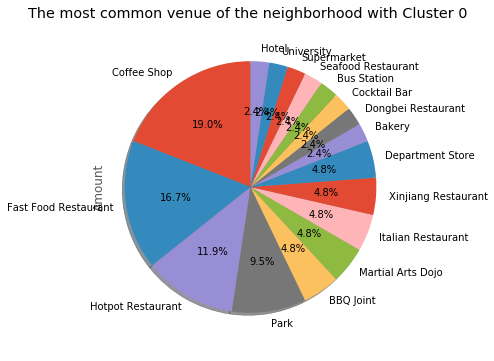

In [185]:
c0g['Amount'].plot(kind='pie',
                                    figsize=(5, 6),
                                    autopct='%1.1f%%', # add in percentages
                                    startangle=90,     # start angle 90° (Africa)
                                    shadow=True,       # add shadow
                                    )
plt.title('The most common venue of the neighborhood with Cluster 0 ')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

In [179]:
c1=nbh100_merged.loc[nbh100_merged['Cluster Labels'] == 1, nbh100_merged.columns[[0] + list(range(5, nbh100_merged.shape[1]))]]
c1g=c1[['1st Most Common Venue']].groupby('1st Most Common Venue').agg({'1st Most Common Venue':'size'})
c1g.columns=['Amount']
c1g.sort_values(by='Amount', ascending=False, inplace=True)
c1g.head(5)

,Amount
1st Most Common Venue,
Hotel,16
Metro Station,8
Clothing Store,1
Coffee Shop,1
Diner,1


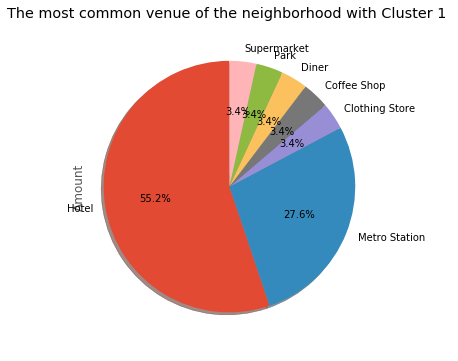

In [188]:
c1g['Amount'].plot(kind='pie',
                                    figsize=(5, 6),
                                    autopct='%1.1f%%', # add in percentages
                                    startangle=90,     # start angle 90° (Africa)
                                    shadow=True,       # add shadow
                                    )
plt.title('The most common venue of the neighborhood with Cluster 1 ')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

In [180]:
c2=nbh100_merged.loc[nbh100_merged['Cluster Labels'] == 2, nbh100_merged.columns[[0] + list(range(5, nbh100_merged.shape[1]))]]
c2g=c2[['1st Most Common Venue']].groupby('1st Most Common Venue').agg({'1st Most Common Venue':'size'})
c2g.columns=['Amount']
c2g.sort_values(by='Amount', ascending=False, inplace=True)
c2g.head(5)

,Amount
1st Most Common Venue,
Chinese Restaurant,11
Coffee Shop,4
Park,3
Art Gallery,1
BBQ Joint,1


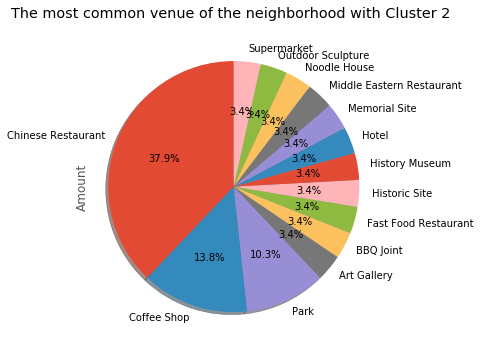

In [189]:
c2g['Amount'].plot(kind='pie',
                                    figsize=(5, 6),
                                    autopct='%1.1f%%', # add in percentages
                                    startangle=90,     # start angle 90° (Africa)
                                    shadow=True,       # add shadow
                                    )
plt.title('The most common venue of the neighborhood with Cluster 2 ')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()